In [16]:
#Graduate Admissions

In [17]:
#Importing all the required packages

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [19]:
#Adding data into the environment

In [20]:
path = "C:/Users/kittu/Downloads/Admission_Predict.csv"

In [21]:
#Checking out the data to be trained

In [22]:
df = pd.read_csv(path)
print(df.shape)
df.columns

(400, 9)


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [23]:
#Setting the input and output of the data


In [24]:
X = df.drop(['Serial No.', 'Chance of Admit '], axis = 1)
Y = df['Chance of Admit ']
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [25]:
#Checking if there are any null values and not available values in data

In [26]:
df.isnull().sum()
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [27]:
#It's training time using linear regression!!!

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [29]:
#Now let's see the linear regression equation generated

In [30]:
intercept = model.intercept_
coefficient = model.coef_
print('Y = {0:0.2f} + ({1:0.3f} * X_train)'.format(intercept, coefficient[0]))

Y = -1.29 + (0.002 * X_train)


In [31]:
#It's prediction time :|

In [32]:
predictions = model.predict(X_test)
predictions.shape

(100,)

In [33]:
#Now lets have a look at the metrics 

In [34]:
metrics_df = pd.DataFrame({'Metric' : ["Mean Absolute error", "Mean Squared error", "Root Mean Squared Error"], 
                           'Value' : [metrics.mean_absolute_error(Y_test, predictions), 
                                     metrics.mean_squared_error(Y_test, predictions),
                                     np.sqrt(metrics.mean_squared_error(Y_test, predictions))]})
metrics_df

,Metric,Value
0,Mean Absolute error,0.047078
1,Mean Squared error,0.004341
2,Root Mean Squared Error,0.065885


In [35]:
#Lets apply random forest on the data and see whether it a better model or not by looking into the metrics again after prediction

In [36]:
rf_model = RandomForestRegressor(n_estimators = 100,random_state = 42)
rf_model.fit(X_train,Y_train)
print('Mean absolute error for RF model: %0.4f' %metrics.mean_absolute_error(Y_test,rf_model.predict(X_test)))

Mean absolute error for RF model: 0.0486


In [37]:
#Now lets see how individual variable in input affects the output

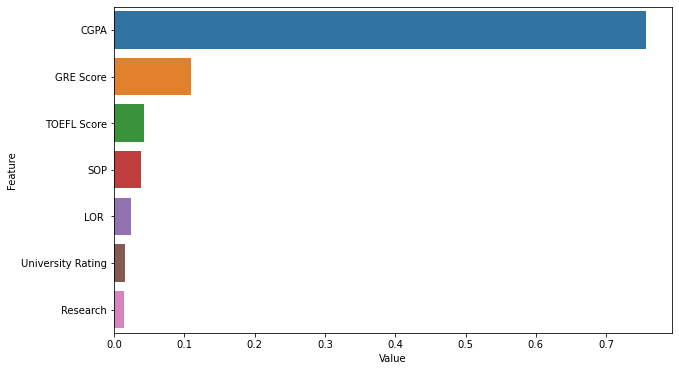

In [38]:
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)), columns = ['Value','Feature']) 
plt.figure(figsize = (10, 6)) 
sns.barplot(x = "Value", y="Feature", data = feature_importance.sort_values(by = "Value", ascending = False)) 

In [39]:
#From the graph we can infer that a tiny change in CGPA can affect the admission result a lot.